## Prompt Chaining
When we interact multiple times with LLMs
In this Workflow, we intend to crate a blog post by first creating an outline of the post.

In [2]:
import os
from getpass import getpass

os.environ["OPENAI_API_KEY"] = getpass("Enter your OpenAI API key: ")

Enter your OpenAI API key: ··········


In [48]:
%%capture output
pip install langgraph langchain langchain_openai

In [29]:
from langgraph.graph import StateGraph, START, END
from langchain_openai import ChatOpenAI
from typing import TypedDict


In [37]:
class Blog_state(TypedDict):
  topic: str
  outline: str
  blog: str

In [38]:
model = ChatOpenAI()

In [39]:
def generate_outline(state: Blog_state) -> Blog_state:
  # Extract topic
  topic = state['topic']

  # Create a prompt
  prompt = f"Generate a brief outline for a blog post on this topic {topic}"

  outline = model.invoke(prompt).content

  state['outline'] = outline

  return state


In [44]:
def generate_blog_post(state: Blog_state) -> Blog_state:

  # Extract the topic and outline
  topic = state['topic']
  outline = state['outline']
  print('Outline Generated = ', outline)

  # Create the prompt
  prompt = f"Generate a blog of less than 200 words on the topic {topic} and whose outline is ths {outline}"

  blog = model.invoke(prompt).content

  state['blog'] = blog

  return state

In [45]:
graph = StateGraph(Blog_state)

# Add Node
graph.add_node('generate_outline', generate_outline)
graph. add_node('generate_blog_post', generate_blog_post)

# Add Edges
graph.add_edge(START, 'generate_outline')
graph.add_edge('generate_outline', 'generate_blog_post')
graph.add_edge('generate_blog_post', END)

# Compile
workflow = graph.compile()


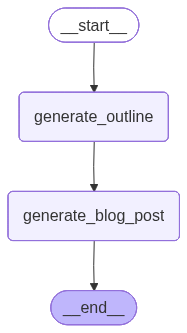

In [46]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())

In [47]:
initial_state = {'topic': 'Artificial Intelligence'}
final_state = workflow.invoke(initial_state)


Outline Generated =  I. Introduction
- Brief overview of what artificial intelligence is
- Importance of artificial intelligence in today's world

II. History of Artificial Intelligence
- A look at the development of artificial intelligence since its inception
- Key milestones in the history of artificial intelligence

III. Applications of Artificial Intelligence
- How artificial intelligence is being used in various industries such as healthcare, finance, and transportation
- Examples of how artificial intelligence is improving efficiency and productivity

IV. Ethical and Social Implications of Artificial Intelligence
- Discussion on the potential risks and ethical concerns surrounding artificial intelligence
- How artificial intelligence is impacting society and the workforce

V. The Future of Artificial Intelligence
- Predictions on the future of artificial intelligence and how it will continue to evolve
- Opportunities and challenges that may arise as artificial intelligence advanc